---
## 1️⃣ IMPORT LIBRARIES

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" All libraries imported successfully!")

 All libraries imported successfully!


---
## 2️⃣ LOAD ALL 4 DATASETS

In [3]:
# Load Dataset 1: Item Master (Products)
items = pd.read_csv('annex1.csv', encoding='utf-8')
print(" Items loaded:", items.shape)
items.head()

 Items loaded: (251, 4)


,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [5]:
# Load Dataset 2: Sales Transactions
sales = pd.read_csv('annex2.csv', encoding='utf-8')
print(" Sales loaded:", sales.shape)
sales.head()

 Sales loaded: (70725, 7)


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [8]:
# Load Dataset 3: Wholesale Prices
wholesale = pd.read_csv('annex3.csv', encoding='utf-8')
print(" Wholesale loaded:", wholesale.shape)
wholesale.head()

 Wholesale loaded: (55982, 3)


,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [7]:
# Load Dataset 4: Loss Rates
losses = pd.read_csv('annex4.csv', encoding='utf-8-sig')
print(" Losses loaded:", losses.shape)
losses.head()

 Losses loaded: (251, 3)


,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


---
## 3️⃣ UNDERSTAND EACH DATASET

In [9]:
# Check Items dataset structure
print("=" * 70)
print("ITEMS DATASET INFO")
print("=" * 70)
items.info()
print("\nUnique Categories:", items['Category Name'].nunique())
print("\nCategory Distribution:")
print(items['Category Name'].value_counts())

ITEMS DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB

Unique Categories: 6

Category Distribution:
Category Name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64


In [10]:
# Check Sales dataset structure
print("=" * 70)
print("SALES DATASET INFO")
print("=" * 70)
sales.info()
print("\nDate Range:", sales['Date'].min(), "to", sales['Date'].max())
print("\nDiscount Distribution:")
print(sales['Discount (Yes/No)'].value_counts())

SALES DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70725 entries, 0 to 70724
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         70725 non-null  object 
 1   Time                         70725 non-null  object 
 2   Item Code                    70725 non-null  int64  
 3   Quantity Sold (kilo)         70724 non-null  float64
 4   Unit Selling Price (RMB/kg)  70724 non-null  float64
 5   Sale or Return               70724 non-null  object 
 6   Discount (Yes/No)            70724 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.8+ MB

Date Range: 2020-07-01 to 2020-09-01

Discount Distribution:
Discount (Yes/No)
No     67538
Yes     3186
Name: count, dtype: int64


In [11]:
# Check Wholesale dataset structure
print("=" * 70)
print("WHOLESALE DATASET INFO")
print("=" * 70)
wholesale.info()

WHOLESALE DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [12]:
# Check Losses dataset structure
print("=" * 70)
print("LOSSES DATASET INFO")
print("=" * 70)
losses.info()
print("\nLoss Rate Statistics:")
print(losses['Loss Rate (%)'].describe())

LOSSES DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB

Loss Rate Statistics:
count    251.000000
mean       9.426693
std        5.211027
min        0.000000
25%        8.225000
50%        9.430000
75%       11.130000
max       29.250000
Name: Loss Rate (%), dtype: float64


---
## 4️⃣ DATA CLEANING

In [13]:
# Clean Sales Data
print("🧹 Cleaning Sales Data...")

# Convert date and time
sales['Date'] = pd.to_datetime(sales['Date'])
sales['DateTime'] = pd.to_datetime(sales['Date'].astype(str) + ' ' + sales['Time'])

# Extract time features
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales['MonthName'] = sales['Date'].dt.month_name()
sales['Week'] = sales['Date'].dt.isocalendar().week
sales['DayOfWeek'] = sales['Date'].dt.day_name()
sales['DayOfWeekNum'] = sales['Date'].dt.dayofweek
sales['Hour'] = sales['DateTime'].dt.hour
sales['IsWeekend'] = sales['DayOfWeekNum'].isin([5, 6]).astype(int)

# Convert to numeric
sales['Quantity Sold (kilo)'] = pd.to_numeric(sales['Quantity Sold (kilo)'], errors='coerce')
sales['Unit Selling Price (RMB/kg)'] = pd.to_numeric(sales['Unit Selling Price (RMB/kg)'], errors='coerce')

# Calculate Revenue
sales['Revenue'] = sales['Quantity Sold (kilo)'] * sales['Unit Selling Price (RMB/kg)']

# Create discount flag
sales['HasDiscount'] = (sales['Discount (Yes/No)'].str.lower() == 'yes').astype(int)

# Remove invalid records
initial_count = len(sales)
sales = sales[
    (sales['Quantity Sold (kilo)'] > 0) &
    (sales['Unit Selling Price (RMB/kg)'] > 0) &
    (sales['Revenue'] > 0)
]

print(f"Removed {initial_count - len(sales):,} invalid records")
print(f"Clean sales records: {len(sales):,}")
sales.head()

🧹 Cleaning Sales Data...
Removed 40 invalid records
Clean sales records: 70,685


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),DateTime,Year,Month,MonthName,Week,DayOfWeek,DayOfWeekNum,Hour,IsWeekend,Revenue,HasDiscount
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,2020-07-01 09:15:07.924,2020,7,July,27,Wednesday,2,9,0,3.0096,0
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2020-07-01 09:17:27.295,2020,7,July,27,Wednesday,2,9,0,2.7168,0
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,2020-07-01 09:17:33.905,2020,7,July,27,Wednesday,2,9,0,3.1084,0
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,2020-07-01 09:19:45.450,2020,7,July,27,Wednesday,2,9,0,4.2100,0
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,2020-07-01 09:20:23.686,2020,7,July,27,Wednesday,2,9,0,4.3120,0


In [14]:
# Clean Wholesale Data
print(" Cleaning Wholesale Data...")

wholesale['Date'] = pd.to_datetime(wholesale['Date'])
wholesale['Wholesale Price (RMB/kg)'] = pd.to_numeric(wholesale['Wholesale Price (RMB/kg)'], errors='coerce')
wholesale = wholesale[wholesale['Wholesale Price (RMB/kg)'] > 0]

print(f" Clean wholesale records: {len(wholesale):,}")

 Cleaning Wholesale Data...
 Clean wholesale records: 55,982


In [15]:
# Clean Loss Data
print(" Cleaning Loss Data...")

# Remove % sign and spaces
losses['Loss Rate (%)'] = losses['Loss Rate (%)'].astype(str).str.replace('%', '').str.strip()
losses['Loss Rate (%)'] = pd.to_numeric(losses['Loss Rate (%)'], errors='coerce')

# Fill missing with median
median_loss = losses['Loss Rate (%)'].median()
losses['Loss Rate (%)'].fillna(median_loss, inplace=True)

print(f" Clean loss records: {len(losses):,}")
losses.head()

 Cleaning Loss Data...
 Clean loss records: 251


,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


---
## 5️⃣ CONNECT ALL 4 DATASETS (MERGE)

In [16]:
# STEP 1: Merge Sales + Items (get category info)
print(" Step 1: Merging Sales + Items...")
df = sales.merge(
    items[['Item Code', 'Item Name', 'Category Code', 'Category Name']],
    on='Item Code',
    how='left'
)
print(f"   Records after merge: {len(df):,}")
print(f"   Columns: {len(df.columns)}")

 Step 1: Merging Sales + Items...
   Records after merge: 70,685
   Columns: 21


In [17]:
# STEP 2: Merge with Wholesale (get cost prices)
print(" Step 2: Merging with Wholesale Prices...")
df = df.merge(
    wholesale[['Date', 'Item Code', 'Wholesale Price (RMB/kg)']],
    on=['Date', 'Item Code'],
    how='left'
)
print(f"   Records after merge: {len(df):,}")
print(f"   Columns: {len(df.columns)}")

 Step 2: Merging with Wholesale Prices...
   Records after merge: 70,685
   Columns: 22


In [18]:
# STEP 3: Merge with Losses (get wastage rates)
print(" Step 3: Merging with Loss Rates...")
df = df.merge(
    losses[['Item Code', 'Loss Rate (%)']],
    on='Item Code',
    how='left'
)
print(f"   Records after merge: {len(df):,}")
print(f"   Columns: {len(df.columns)}")

print("\n" + "=" * 70)
print(" ALL 4 DATASETS SUCCESSFULLY CONNECTED!")
print("=" * 70)

 Step 3: Merging with Loss Rates...
   Records after merge: 70,685
   Columns: 23

 ALL 4 DATASETS SUCCESSFULLY CONNECTED!


In [19]:
# Display the merged dataset
print("\n MASTER DATASET PREVIEW:")
df.head(10)


 MASTER DATASET PREVIEW:


,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),DateTime,Year,Month,MonthName,Week,DayOfWeek,DayOfWeekNum,Hour,IsWeekend,Revenue,HasDiscount,Item Name,Category Code,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,2020-07-01 09:15:07.924,2020,7,July,27,Wednesday,2,9,0,3.0096,0,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2020-07-01 09:17:27.295,2020,7,July,27,Wednesday,2,9,0,2.7168,0,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,2020-07-01 09:17:33.905,2020,7,July,27,Wednesday,2,9,0,3.1084,0,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,2020-07-01 09:19:45.450,2020,7,July,27,Wednesday,2,9,0,4.2100,0,Shanghaiqing,1011010101,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,2020-07-01 09:20:23.686,2020,7,July,27,Wednesday,2,9,0,4.3120,0,Caixin,1011010101,Flower/Leaf Vegetables,4.60,13.70
5,2020-07-01,09:21:55.556,102900005117056,0.277,7.6,sale,No,2020-07-01 09:21:55.556,2020,7,July,27,Wednesday,2,9,0,2.1052,0,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
6,2020-07-01,09:21:56.536,102900005115779,0.338,8.0,sale,No,2020-07-01 09:21:56.536,2020,7,July,27,Wednesday,2,9,0,2.7040,0,Yunnan Shengcai,1011010101,Flower/Leaf Vegetables,6.72,15.25
7,2020-07-01,09:22:01.274,102900005117056,0.132,7.6,sale,No,2020-07-01 09:22:01.274,2020,7,July,27,Wednesday,2,9,0,1.0032,0,Paopaojiao (Jingpin),1011010504,Capsicum,4.32,7.08
8,2020-07-01,09:22:01.476,102900005115779,0.213,8.0,sale,No,2020-07-01 09:22:01.476,2020,7,July,27,Wednesday,2,9,0,1.7040,0,Yunnan Shengcai,1011010101,Flower/Leaf Vegetables,6.72,15.25
9,2020-07-01,09:22:15.998,102900011008522,0.514,8.0,sale,No,2020-07-01 09:22:15.998,2020,7,July,27,Wednesday,2,9,0,4.1120,0,Sweet Chinese Cabbage,1011010101,Flower/Leaf Vegetables,4.44,9.43


In [20]:
# Check column names
print("\n All Columns in Master Dataset:")
print(df.columns.tolist())


 All Columns in Master Dataset:
['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)', 'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)', 'DateTime', 'Year', 'Month', 'MonthName', 'Week', 'DayOfWeek', 'DayOfWeekNum', 'Hour', 'IsWeekend', 'Revenue', 'HasDiscount', 'Item Name', 'Category Code', 'Category Name', 'Wholesale Price (RMB/kg)', 'Loss Rate (%)']


---
## 6️⃣ CALCULATE BUSINESS METRICS

In [21]:
# Calculate Cost, Profit, Margin, Loss
print(" Calculating Business Metrics...")

# Cost = Quantity × Wholesale Price
df['Cost'] = (df['Quantity Sold (kilo)'] * df['Wholesale Price (RMB/kg)']).fillna(0)

# Gross Profit = Revenue - Cost
df['Gross Profit'] = df['Revenue'] - df['Cost']

# Gross Margin %
df['Gross Margin %'] = ((df['Gross Profit'] / df['Revenue']) * 100).fillna(0)

# Loss Cost = Cost × Loss Rate
df['Loss Cost'] = (df['Cost'] * (df['Loss Rate (%)'] / 100)).fillna(0)

# Net Profit = Gross Profit - Loss Cost
df['Net Profit'] = df['Gross Profit'] - df['Loss Cost']

# Net Margin %
df['Net Margin %'] = ((df['Net Profit'] / df['Revenue']) * 100).fillna(0)

# Markup %
df['Markup %'] = (((df['Unit Selling Price (RMB/kg)'] - df['Wholesale Price (RMB/kg)']) /
                   df['Wholesale Price (RMB/kg)']) * 100).fillna(0)

print(" All business metrics calculated!")
print("\n New columns added:")
print("   - Cost")
print("   - Gross Profit")
print("   - Gross Margin %")
print("   - Loss Cost")
print("   - Net Profit")
print("   - Net Margin %")
print("   - Markup %")

 Calculating Business Metrics...
 All business metrics calculated!

 New columns added:
   - Cost
   - Gross Profit
   - Gross Margin %
   - Loss Cost
   - Net Profit
   - Net Margin %
   - Markup %


In [22]:
# Display sample with all metrics
df[['Item Name', 'Revenue', 'Cost', 'Gross Profit', 'Loss Cost', 'Net Profit', 'Net Margin %']].head(10)

,Item Name,Revenue,Cost,Gross Profit,Loss Cost,Net Profit,Net Margin %
0,Paopaojiao (Jingpin),3.0096,1.71072,1.29888,0.121119,1.177761,39.133474
1,Chinese Cabbage,2.7168,1.78290,0.93390,0.397052,0.536848,19.760313
2,Paopaojiao (Jingpin),3.1084,1.76688,1.34152,0.125095,1.216425,39.133474
3,Shanghaiqing,4.2100,2.95963,1.25037,0.427075,0.823295,19.555710
4,Caixin,4.3120,2.47940,1.83260,0.339678,1.492922,34.622500
5,Paopaojiao (Jingpin),2.1052,1.19664,0.90856,0.084722,0.823838,39.133474
6,Yunnan Shengcai,2.7040,2.27136,0.43264,0.346382,0.086258,3.190000
7,Paopaojiao (Jingpin),1.0032,0.57024,0.43296,0.040373,0.392587,39.133474
8,Yunnan Shengcai,1.7040,1.43136,0.27264,0.218282,0.054358,3.190000
9,Sweet Chinese Cabbage,4.1120,2.28216,1.82984,0.215208,1.614632,39.266350


---
## 7️⃣ DATA QUALITY CHECK

In [23]:
# Check for missing values
print("🔍 MISSING VALUES CHECK:")
print("=" * 70)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

🔍 MISSING VALUES CHECK:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


In [24]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 DUPLICATE ROWS: {duplicates:,}")


🔍 DUPLICATE ROWS: 0


In [25]:
# Dataset summary
print("\n DATASET SUMMARY:")
print("=" * 70)
df.info()


 DATASET SUMMARY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70685 entries, 0 to 70684
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         70685 non-null  datetime64[ns]
 1   Time                         70685 non-null  object        
 2   Item Code                    70685 non-null  int64         
 3   Quantity Sold (kilo)         70685 non-null  float64       
 4   Unit Selling Price (RMB/kg)  70685 non-null  float64       
 5   Sale or Return               70685 non-null  object        
 6   Discount (Yes/No)            70685 non-null  object        
 7   DateTime                     70685 non-null  datetime64[ns]
 8   Year                         70685 non-null  int32         
 9   Month                        70685 non-null  int32         
 10  MonthName                    70685 non-null  object        
 11  Week                  

---
## 8️⃣ EXPLORATORY DATA ANALYSIS (EDA)

In [26]:
# Overall Summary Statistics
print(" OVERALL BUSINESS SUMMARY")
print("=" * 70)

total_revenue = df['Revenue'].sum()
total_cost = df['Cost'].sum()
total_gross_profit = df['Gross Profit'].sum()
total_loss_cost = df['Loss Cost'].sum()
total_net_profit = df['Net Profit'].sum()
total_transactions = len(df)
total_quantity = df['Quantity Sold (kilo)'].sum()

print(f"Total Revenue:        ¥{total_revenue:,.2f}")
print(f"Total Cost:           ¥{total_cost:,.2f}")
print(f"Total Gross Profit:   ¥{total_gross_profit:,.2f}")
print(f"Total Loss Cost:      ¥{total_loss_cost:,.2f}")
print(f"Total Net Profit:     ¥{total_net_profit:,.2f}")
print(f"\nGross Margin:        {(total_gross_profit/total_revenue)*100:.2f}%")
print(f"Net Margin:          {(total_net_profit/total_revenue)*100:.2f}%")
print(f"Loss Impact:         {(total_loss_cost/total_revenue)*100:.2f}%")
print(f"\nTotal Transactions:  {total_transactions:,}")
print(f"Total Quantity Sold: {total_quantity:,.2f} kg")
print(f"Avg Transaction:     ¥{df['Revenue'].mean():.2f}")
print(f"Avg Price:           ¥{df['Unit Selling Price (RMB/kg)'].mean():.2f}/kg")

 OVERALL BUSINESS SUMMARY
Total Revenue:        ¥258,862.61
Total Cost:           ¥157,666.43
Total Gross Profit:   ¥101,196.18
Total Loss Cost:      ¥17,132.27
Total Net Profit:     ¥84,063.91

Gross Margin:        39.09%
Net Margin:          32.47%
Loss Impact:         6.62%

Total Transactions:  70,685
Total Quantity Sold: 29,372.46 kg
Avg Transaction:     ¥3.66
Avg Price:           ¥9.81/kg


In [27]:
# Descriptive Statistics
print("\n📊 DESCRIPTIVE STATISTICS:")
df[['Quantity Sold (kilo)', 'Unit Selling Price (RMB/kg)', 'Revenue',
    'Gross Margin %', 'Net Margin %', 'Loss Rate (%)']].describe()


📊 DESCRIPTIVE STATISTICS:


,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Revenue,Gross Margin %,Net Margin %,Loss Rate (%)
count,70685.00000,70685.000000,70685.000000,70685.000000,70685.000000,70685.000000
mean,0.41554,9.807137,3.662200,38.798207,32.129194,10.926081
std,0.24276,4.492549,2.097258,24.455787,27.488334,4.721595
min,0.00600,0.100000,0.020100,-2975.000000,-3443.937500,2.480000
25%,0.26100,7.600000,2.210000,33.875000,27.358383,7.080000
50%,0.37600,8.800000,3.310000,39.393939,32.072222,10.180000
75%,0.51100,10.000000,4.608000,44.444444,38.566975,13.820000
max,5.00000,39.800000,32.482400,76.937500,73.482500,29.250000


---
## 9️⃣ TOP PRODUCTS ANALYSIS

In [28]:
# Top 20 Products by Revenue
print("🏆 TOP 20 PRODUCTS BY REVENUE")
print("=" * 70)

top_products = df.groupby('Item Name').agg({
    'Revenue': 'sum',
    'Net Profit': 'sum',
    'Quantity Sold (kilo)': 'sum'
}).sort_values('Revenue', ascending=False).head(20)

top_products['Net Margin %'] = (top_products['Net Profit'] / top_products['Revenue'] * 100)

print(top_products)

🏆 TOP 20 PRODUCTS BY REVENUE
                             Revenue   Net Profit  Quantity Sold (kilo)  \
Item Name                                                                 
Paopaojiao (Jingpin)      24610.1615  6897.749121              2950.591   
Broccoli                  23060.0993  6619.255343              1744.781   
Yunnan Shengcai           17746.1817  4575.887786              1881.259   
Xixia Mushroom (1)        17437.4056  5050.920938               878.694   
Yunnan Lettuces           12556.7837  3964.831789              1692.373   
Qinggengsanhua            12003.8214  3778.629742              1554.832   
Huangbaicai (2)           11586.4596  3968.968759              1607.598   
Shanghaiqing              10542.8360  3389.215588              1165.369   
Chinese Cabbage           10330.8755  3386.300636              1455.163   
Net Lotus Root (1)        10161.1515  3375.176981               966.578   
Sweet Chinese Cabbage      9567.1044  3190.262696              1215.757

In [29]:
# Top 10 High Margin Products
print("\n TOP 10 HIGH MARGIN PRODUCTS")
print("=" * 70)

product_margin = df.groupby('Item Name').agg({
    'Revenue': 'sum',
    'Net Profit': 'sum'
})
product_margin['Net Margin %'] = (product_margin['Net Profit'] / product_margin['Revenue'] * 100)

high_margin = product_margin[product_margin['Revenue'] > product_margin['Revenue'].quantile(0.5)]
print(high_margin.nlargest(10, 'Net Margin %'))


 TOP 10 HIGH MARGIN PRODUCTS
                            Revenue   Net Profit  Net Margin %
Item Name                                                     
Millet Pepper             3413.9052  1692.949057     49.589809
Red Hang Pepper           1870.3863   874.574215     46.759015
Needle Mushroom (1)       7961.3976  3533.360632     44.381160
Apricot Bao Mushroom (1)  7730.5730  3123.525149     40.404834
Dalong Eggplant           5026.6688  2024.519641     40.275573
Yellow Xincai (1)         1800.9803   711.762238     39.520823
Wawacai                   5019.6000  1952.148144     38.890512
Green Line Pepper         3134.1579  1211.827789     38.665180
Green Eggplant (1)        4152.4939  1599.867283     38.527866
Haixian Mushroom (1)      1989.0776   742.042364     37.305853


---
## 🔟 CATEGORY ANALYSIS

In [30]:
# Category Performance
print(" CATEGORY PERFORMANCE")
print("=" * 70)

category_stats = df.groupby('Category Name').agg({
    'Revenue': 'sum',
    'Gross Profit': 'sum',
    'Net Profit': 'sum',
    'Loss Cost': 'sum',
    'Quantity Sold (kilo)': 'sum',
    'Item Code': 'nunique'
}).rename(columns={'Item Code': 'Unique Items'})

category_stats['Gross Margin %'] = (category_stats['Gross Profit'] / category_stats['Revenue'] * 100)
category_stats['Net Margin %'] = (category_stats['Net Profit'] / category_stats['Revenue'] * 100)
category_stats['Loss %'] = (category_stats['Loss Cost'] / category_stats['Revenue'] * 100)

category_stats = category_stats.sort_values('Revenue', ascending=False)
print(category_stats.head(15))

 CATEGORY PERFORMANCE
                                 Revenue  Gross Profit    Net Profit  \
Category Name                                                          
Flower/Leaf Vegetables       104496.7265   41756.34967  33537.483022   
Capsicum                      48301.9261   17928.97156  15436.469130   
Edible Mushroom               39277.7956   16292.34782  14103.061382   
Cabbage                       35063.9207   12989.99560  10397.885084   
Solanum                       18206.5692    7204.58109   6430.151790   
Aquatic Tuberous Vegetables   13515.6727    5023.93732   4158.863313   

                               Loss Cost  Quantity Sold (kilo)  Unique Items  \
Category Name                                                                  
Flower/Leaf Vegetables       8218.866648             13967.599            21   
Capsicum                     2492.502430              5078.258            11   
Edible Mushroom              2189.286438              3276.461            15   
C

---
## 1️⃣1️⃣ TIME-BASED ANALYSIS

In [31]:
# Daily Revenue Trend
print(" DAILY REVENUE ANALYSIS")
print("=" * 70)

daily_revenue = df.groupby('Date').agg({
    'Revenue': 'sum',
    'Net Profit': 'sum',
    'Item Code': 'count'
}).rename(columns={'Item Code': 'Transactions'})

print(f"Average Daily Revenue: ¥{daily_revenue['Revenue'].mean():,.2f}")
print(f"Peak Revenue Day: {daily_revenue['Revenue'].idxmax()} - ¥{daily_revenue['Revenue'].max():,.2f}")
print(f"Lowest Revenue Day: {daily_revenue['Revenue'].idxmin()} - ¥{daily_revenue['Revenue'].min():,.2f}")

print("\nTop 5 Revenue Days:")
print(daily_revenue.nlargest(5, 'Revenue'))

 DAILY REVENUE ANALYSIS
Average Daily Revenue: ¥4,108.93
Peak Revenue Day: 2020-07-19 00:00:00 - ¥6,071.98
Lowest Revenue Day: 2020-09-01 00:00:00 - ¥2,169.31

Top 5 Revenue Days:
              Revenue   Net Profit  Transactions
Date                                            
2020-07-19  6071.9841  2071.933897          1624
2020-08-08  5628.5098  1859.919717          1508
2020-07-26  5448.1701  1738.877558          1392
2020-07-12  5337.6354  1786.674827          1454
2020-08-29  5228.6324  1560.087877          1389


In [32]:
# Monthly Revenue
print("\n MONTHLY REVENUE")
print("=" * 70)

monthly_revenue = df.groupby('MonthName').agg({
    'Revenue': 'sum',
    'Net Profit': 'sum',
    'Quantity Sold (kilo)': 'sum'
}).sort_values('Revenue', ascending=False)

print(monthly_revenue)


 MONTHLY REVENUE
               Revenue    Net Profit  Quantity Sold (kilo)
MonthName                                                 
August     133932.0319  42283.859167             15475.786
July       122761.2647  41158.014033             13642.358
September    2169.3142    622.040522               254.316


In [34]:
# Day of Week Analysis
print("\n DAY OF WEEK ANALYSIS")
print("=" * 70)

dow_revenue = df.groupby('DayOfWeek').agg({
    'Revenue': 'sum',
    'Item Code': 'count'
}).rename(columns={'Item Code': 'Transactions'})

# Sort by day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_revenue = dow_revenue.reindex(day_order)

print(dow_revenue)


 DAY OF WEEK ANALYSIS
              Revenue  Transactions
DayOfWeek                          
Monday     34418.0168          9488
Tuesday    31788.4354          8718
Wednesday  35481.0109          9798
Thursday   33443.5450          9182
Friday     33559.8409          9162
Saturday   44240.3270         12008
Sunday     45931.4348         12329


In [35]:
# Hourly Sales Pattern
print("\n HOURLY SALES PATTERN")
print("=" * 70)

hourly_revenue = df.groupby('Hour').agg({
    'Revenue': 'sum',
    'Item Code': 'count'
}).rename(columns={'Item Code': 'Transactions'})

peak_hour = hourly_revenue['Revenue'].idxmax()
print(f"Peak Sales Hour: {peak_hour}:00 - ¥{hourly_revenue.loc[peak_hour, 'Revenue']:,.2f}")
print("\nRevenue by Hour:")
print(hourly_revenue)


 HOURLY SALES PATTERN
Peak Sales Hour: 10:00 - ¥40,012.75

Revenue by Hour:
         Revenue  Transactions
Hour                          
9     24899.4282          6753
10    40012.7548         10811
11    30184.0586          8295
12    13699.8487          3734
13     9437.5033          2448
14     9268.2022          2469
15    13214.8813          3547
16    20638.6159          5573
17    25718.1507          6926
18    27983.0883          7886
19    20559.3243          5737
20    17989.6873          5014
21     5214.4159          1481
22       42.6513            11


---
## 1️⃣2️⃣ LOSS ANALYSIS

In [36]:
# Loss Impact Analysis
print(" LOSS & WASTAGE ANALYSIS")
print("=" * 70)

loss_by_product = df.groupby('Item Name').agg({
    'Loss Cost': 'sum',
    'Loss Rate (%)': 'mean',
    'Revenue': 'sum'
}).sort_values('Loss Cost', ascending=False)

print(f"Total Loss Cost: ¥{df['Loss Cost'].sum():,.2f}")
print(f"Average Loss Rate: {df['Loss Rate (%)'].mean():.2f}%")
print(f"Loss as % of Revenue: {(df['Loss Cost'].sum()/df['Revenue'].sum())*100:.2f}%")

print("\nTop 15 Products by Loss Cost:")
print(loss_by_product.head(15))

 LOSS & WASTAGE ANALYSIS
Total Loss Cost: ¥17,132.27
Average Loss Rate: 10.93%
Loss as % of Revenue: 6.62%

Top 15 Products by Loss Cost:
                         Loss Cost  Loss Rate (%)     Revenue
Item Name                                                    
Yunnan Shengcai        1742.707004      15.250000  17746.1817
Xixia Mushroom (1)     1503.964312      13.820000  17437.4056
Broccoli               1393.393877       9.260000  23060.0993
Qinggengsanhua         1198.716638      17.060000  12003.8214
Paopaojiao (Jingpin)   1171.123269       7.080000  24610.1615
Huangbaicai (2)        1028.535871      15.610000  11586.4596
Yunnan Lettuces         975.648471      12.810000  12556.7837
Shanghaiqing            902.095102      14.430000  10542.8360
Chinese Cabbage         790.226444      16.137492  10330.8755
Caixin                  614.121055      13.700000   7576.7999
Sweet Chinese Cabbage   549.516744       9.430000   9567.1044
Luosi Pepper            534.365432      10.180000   8086

In [37]:
# High Loss Rate Products
print("\n HIGH LOSS RATE PRODUCTS (>5%)")
print("=" * 70)

high_loss = loss_by_product[loss_by_product['Loss Rate (%)'] > 5].sort_values('Loss Rate (%)', ascending=False)
print(high_loss.head(20))


 HIGH LOSS RATE PRODUCTS (>5%)
                                  Loss Cost  Loss Rate (%)     Revenue
Item Name                                                             
High Melon (1)                   218.191548      29.250000   1390.0418
Dongmenkou Xiaobaicai            128.926678      27.840000    789.4940
Foreign Garland Chrysanthemum    179.283968      26.160000   1177.2738
Honghu Lotus Root                269.580952      24.050000   1592.0414
Kuaicai                           89.511569      20.380000    753.4520
Amaranth                         249.450829      18.520000   2319.9912
Spinach                           59.024819      18.510000    537.1880
Qinggengsanhua                  1198.716638      17.060000  12003.8214
Red Lotus Root Zone                2.313649      16.630000     26.2500
Bell Pepper (1)                   46.212296      16.330000    571.0813
Chinese Cabbage                  790.226444      16.137492  10330.8755
The Crab Flavor Mushroom (2)       1.257536  

---
## 1️⃣3️⃣ PRICING ANALYSIS

In [38]:
# Price Statistics
print(" PRICING ANALYSIS")
print("=" * 70)

print("Selling Price Distribution:")
print(f"  Mean: ¥{df['Unit Selling Price (RMB/kg)'].mean():.2f}/kg")
print(f"  Median: ¥{df['Unit Selling Price (RMB/kg)'].median():.2f}/kg")
print(f"  Std Dev: ¥{df['Unit Selling Price (RMB/kg)'].std():.2f}/kg")
print(f"  Min: ¥{df['Unit Selling Price (RMB/kg)'].min():.2f}/kg")
print(f"  Max: ¥{df['Unit Selling Price (RMB/kg)'].max():.2f}/kg")

print("\nMarkup Statistics:")
print(f"  Average Markup: {df['Markup %'].mean():.1f}%")
print(f"  Median Markup: {df['Markup %'].median():.1f}%")

print("\nDiscount Impact:")
discount_sales = df[df['HasDiscount'] == 1]
no_discount_sales = df[df['HasDiscount'] == 0]

print(f"  Transactions with Discount: {len(discount_sales):,} ({len(discount_sales)/len(df)*100:.1f}%)")
print(f"  Avg Revenue (with discount): ¥{discount_sales['Revenue'].mean():.2f}")
print(f"  Avg Revenue (no discount): ¥{no_discount_sales['Revenue'].mean():.2f}")

 PRICING ANALYSIS
Selling Price Distribution:
  Mean: ¥9.81/kg
  Median: ¥8.80/kg
  Std Dev: ¥4.49/kg
  Min: ¥0.10/kg
  Max: ¥39.80/kg

Markup Statistics:
  Average Markup: 67.9%
  Median Markup: 65.0%

Discount Impact:
  Transactions with Discount: 3,186 (4.5%)
  Avg Revenue (with discount): ¥3.21
  Avg Revenue (no discount): ¥3.68


---
## 1️⃣4️⃣ CORRELATION ANALYSIS

In [39]:
# Calculate correlation matrix
print(" CORRELATION ANALYSIS")
print("=" * 70)

corr_cols = ['Quantity Sold (kilo)', 'Unit Selling Price (RMB/kg)', 'Revenue',
             'Gross Margin %', 'Net Margin %', 'Loss Rate (%)', 'Markup %']

correlation_matrix = df[corr_cols].corr()
print(correlation_matrix)

 CORRELATION ANALYSIS
                             Quantity Sold (kilo)  \
Quantity Sold (kilo)                     1.000000   
Unit Selling Price (RMB/kg)             -0.378747   
Revenue                                  0.696163   
Gross Margin %                           0.006867   
Net Margin %                             0.004080   
Loss Rate (%)                            0.045213   
Markup %                                -0.006652   

                             Unit Selling Price (RMB/kg)   Revenue  \
Quantity Sold (kilo)                           -0.378747  0.696163   
Unit Selling Price (RMB/kg)                     1.000000  0.237439   
Revenue                                         0.237439  1.000000   
Gross Margin %                                  0.071158  0.021022   
Net Margin %                                    0.068752  0.021925   
Loss Rate (%)                                  -0.013785 -0.004933   
Markup %                                        0.105589 -0.040

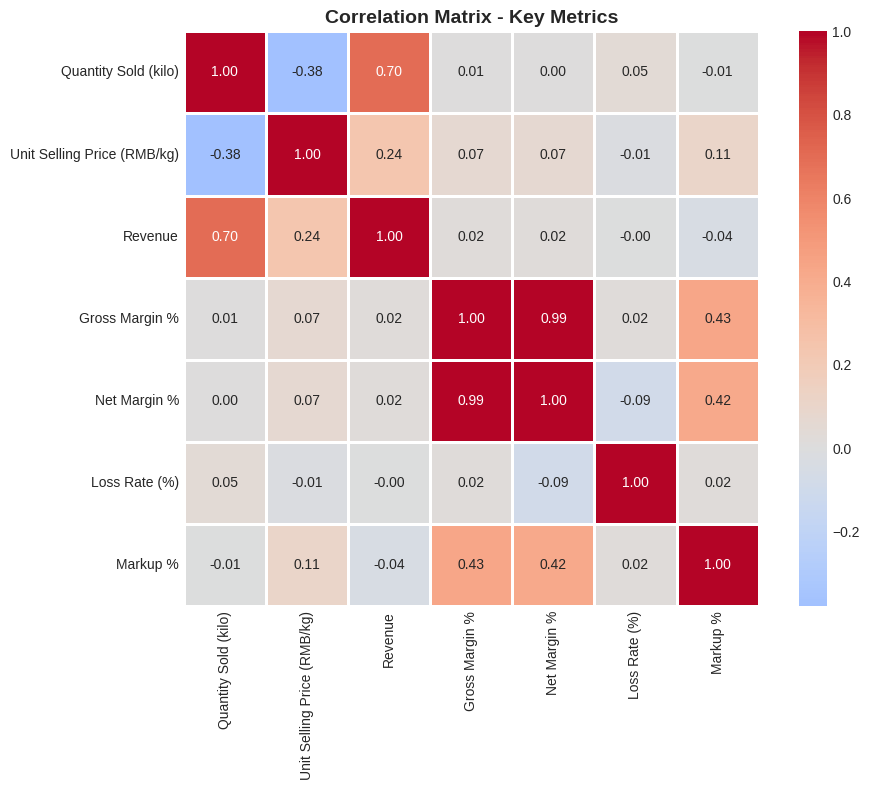

In [40]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Matrix - Key Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 1️⃣5️⃣ VISUALIZATIONS

In [41]:
# 1. Daily Revenue Trend
daily_data = df.groupby('Date')['Revenue'].sum().reset_index()

fig = px.line(daily_data, x='Date', y='Revenue',
              title='Daily Revenue Trend',
              labels={'Revenue': 'Revenue (¥)', 'Date': 'Date'})
fig.update_layout(hovermode='x unified', template='plotly_white', height=500)
fig.show()

In [42]:
# 2. Top 15 Products Revenue Bar Chart
top15 = df.groupby('Item Name')['Revenue'].sum().nlargest(15).reset_index()

fig = px.bar(top15, x='Revenue', y='Item Name', orientation='h',
             title='Top 15 Products by Revenue',
             labels={'Revenue': 'Revenue (¥)', 'Item Name': 'Product'})
fig.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_white', height=600)
fig.show()

In [43]:
# 3. Category Performance
cat_data = df.groupby('Category Name').agg({
    'Revenue': 'sum',
    'Net Profit': 'sum'
}).nlargest(15, 'Revenue').reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(name='Revenue', x=cat_data['Category Name'], y=cat_data['Revenue'], marker_color='skyblue'))
fig.add_trace(go.Bar(name='Net Profit', x=cat_data['Category Name'], y=cat_data['Net Profit'], marker_color='green'))

fig.update_layout(title='Top 15 Categories: Revenue vs Net Profit',
                  xaxis_title='Category', yaxis_title='Amount (¥)',
                  barmode='group', template='plotly_white', height=600,
                  xaxis_tickangle=-45)
fig.show()

In [44]:
# 4. Hourly Sales Heatmap
hourly_dow = df.groupby(['DayOfWeekNum', 'Hour'])['Revenue'].sum().reset_index()
pivot_data = hourly_dow.pivot(index='DayOfWeekNum', columns='Hour', values='Revenue')

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pivot_data.index = day_names

fig = px.imshow(pivot_data,
                labels=dict(x="Hour of Day", y="Day of Week", color="Revenue (¥)"),
                title="Sales Heatmap: Day of Week vs Hour",
                aspect="auto", color_continuous_scale='YlOrRd')
fig.update_layout(template='plotly_white', height=500)
fig.show()

In [45]:
# 5. Price Distribution
fig = px.histogram(df, x='Unit Selling Price (RMB/kg)', nbins=50,
                   title='Price Distribution',
                   labels={'Unit Selling Price (RMB/kg)': 'Price (¥/kg)'})
fig.update_layout(template='plotly_white', height=500, showlegend=False)
fig.show()

In [46]:
# 6. Loss Analysis Chart
loss_top20 = df.groupby('Item Name')['Loss Cost'].sum().nlargest(20).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=loss_top20['Item Name'], y=loss_top20['Loss Cost'],
                     marker_color='crimson',
                     hovertemplate='<b>%{x}</b><br>Loss: ¥%{y:,.2f}<extra></extra>'))

fig.update_layout(title='Top 20 Items by Loss Cost',
                  xaxis_title='Product', yaxis_title='Loss Cost (¥)',
                  template='plotly_white', height=600, xaxis_tickangle=-45)
fig.show()

In [47]:
# 7. Revenue vs Margin Scatter Plot
product_stats = df.groupby('Item Name').agg({
    'Revenue': 'sum',
    'Net Profit': 'sum',
    'Quantity Sold (kilo)': 'sum',
    'Category Name': 'first'
}).reset_index()

product_stats['Net Margin %'] = (product_stats['Net Profit'] / product_stats['Revenue'] * 100)

# Filter for better visualization
plot_data = product_stats[product_stats['Revenue'] > product_stats['Revenue'].quantile(0.25)]

fig = px.scatter(plot_data, x='Revenue', y='Net Margin %',
                 size='Quantity Sold (kilo)', color='Category Name',
                 hover_name='Item Name',
                 title='Revenue vs Margin Analysis (by Category)',
                 labels={'Revenue': 'Revenue (¥)', 'Net Margin %': 'Net Margin (%)'})
fig.update_layout(template='plotly_white', height=600)
fig.show()

In [ ]:
# 8. Monthly Revenue Comparison
monthly_data = df.groupby('MonthName').agg({
    'Revenue': 'sum',
    'Net Profit': 'sum'
}).reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['MonthName'] = pd.Categorical(monthly_data['MonthName'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('MonthName')

fig = go.Figure()
fig.add_trace(go.Bar(name='Revenue', x=monthly_data['MonthName'], y=monthly_data['Revenue'], marker_color='lightblue'))
fig.add_trace(go.Bar(name='Net Profit', x=monthly_data['MonthName'], y=monthly_data['Net Profit'], marker_color='green'))

fig.update_layout(title='Monthly Revenue & Profit Comparison',
                  xaxis_title='Month', yaxis_title='Amount (¥)',
                  barmode='group', template='plotly_white', height=500)
fig.show()

---
## 1️⃣6️⃣ KEY INSIGHTS & RECOMMENDATIONS

In [48]:
# Generate Key Insights
print(" KEY BUSINESS INSIGHTS")
print("=" * 70)

# 1. Revenue concentration
top5_items = df.groupby('Item Name')['Revenue'].sum().nlargest(5)
top5_pct = (top5_items.sum() / df['Revenue'].sum()) * 100
print(f"\n1. REVENUE CONCENTRATION")
print(f"   Top 5 items account for {top5_pct:.1f}% of total revenue")
print(f"   Focus on these high-performers for growth")

# 2. Profitability
avg_margin = (df['Net Profit'].sum() / df['Revenue'].sum()) * 100
print(f"\n2. PROFITABILITY")
print(f"   Overall net margin: {avg_margin:.2f}%")
if avg_margin < 20:
    print(f"   Margin below 20% - consider price optimization")
else:
    print(f"    Healthy margin above 20%")

# 3. Loss impact
loss_pct = (df['Loss Cost'].sum() / df['Revenue'].sum()) * 100
print(f"\n3. LOSS IMPACT")
print(f"   Wastage costs: ¥{df['Loss Cost'].sum():,.2f} ({loss_pct:.2f}% of revenue)")
if loss_pct > 5:
    print(f"    High loss rate - implement better inventory management")

# 4. Time patterns
dow_sales = df.groupby('DayOfWeek')['Revenue'].sum()
best_day = dow_sales.idxmax()
worst_day = dow_sales.idxmin()
print(f"\n4. WEEKLY PATTERN")
print(f"   Best day: {best_day}")
print(f"   Worst day: {worst_day}")
print(f"    Recommendation: Run promotions on {worst_day} to boost sales")

# 5. Peak hours
hourly = df.groupby('Hour')['Revenue'].sum()
peak_hour = hourly.idxmax()
print(f"\n5. PEAK HOURS")
print(f"   Peak sales hour: {peak_hour}:00")
print(f"    Recommendation: Ensure adequate staffing during peak hours")

# 6. High loss items
high_loss_items = df.groupby('Item Name').agg({
    'Loss Cost': 'sum',
    'Loss Rate (%)': 'mean'
}).nlargest(5, 'Loss Cost')
print(f"\n6. HIGH LOSS ITEMS (Top 5)")
for item, row in high_loss_items.iterrows():
    print(f"   {item}: ¥{row['Loss Cost']:,.2f} loss ({row['Loss Rate (%)']:.1f}%)")
print(f"   💡 Recommendation: Review storage/handling for these items")

print("\n" + "=" * 70)
print(" ANALYSIS COMPLETE!")
print("=" * 70)

 KEY BUSINESS INSIGHTS

1. REVENUE CONCENTRATION
   Top 5 items account for 36.9% of total revenue
   Focus on these high-performers for growth

2. PROFITABILITY
   Overall net margin: 32.47%
    Healthy margin above 20%

3. LOSS IMPACT
   Wastage costs: ¥17,132.27 (6.62% of revenue)
    High loss rate - implement better inventory management

4. WEEKLY PATTERN
   Best day: Sunday
   Worst day: Tuesday
    Recommendation: Run promotions on Tuesday to boost sales

5. PEAK HOURS
   Peak sales hour: 10:00
    Recommendation: Ensure adequate staffing during peak hours

6. HIGH LOSS ITEMS (Top 5)
   Yunnan Shengcai: ¥1,742.71 loss (15.2%)
   Xixia Mushroom (1): ¥1,503.96 loss (13.8%)
   Broccoli: ¥1,393.39 loss (9.3%)
   Qinggengsanhua: ¥1,198.72 loss (17.1%)
   Paopaojiao (Jingpin): ¥1,171.12 loss (7.1%)
   💡 Recommendation: Review storage/handling for these items

 ANALYSIS COMPLETE!


---
## 1️⃣7️⃣ SAVE RESULTS

In [49]:
# Save the master dataset
df.to_csv('master_dataset.csv', index=False, encoding='utf-8')
print(" Master dataset saved: master_dataset.csv")

# Save key summary tables
category_stats.to_csv('category_performance.csv')
print("Category performance saved: category_performance.csv")

top_products.to_csv('top_products.csv')
print(" Top products saved: top_products.csv")

loss_by_product.to_csv('loss_analysis.csv')
print(" Loss analysis saved: loss_analysis.csv")

print("\n🎉 All results saved successfully!")

 Master dataset saved: master_dataset.csv
Category performance saved: category_performance.csv
 Top products saved: top_products.csv
 Loss analysis saved: loss_analysis.csv

🎉 All results saved successfully!
